In [11]:
from skimage.color import rgb2gray
from skimage.exposure import equalize_adapthist, rescale_intensity
from scipy import signal
from sklearn.metrics import mean_squared_error
import numpy as np
import skimage.io as io
from skimage.util import *
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.exposure import equalize_adapthist, rescale_intensity
from scipy import signal
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.integrate import quad
from math import exp as e
from math import pi as pi
from numpy import NINF as negative_infinity
from numpy import PINF as positive_infinity
import matplotlib.pyplot as plt


def integrateFy(x, y, sigmaX, sigmaZ):
    root_2pi = (2*pi)**0.5
    
    gp = (-0.5) * ((y-x)/sigmaZ)*((y-x)/sigmaZ)
    gaussian = (1/root_2pi*sigmaZ) * e(gp)
    
    laplacePow = - abs(x) / sigmaX
    laplace = (2*sigmaX)**-1 * e(laplacePow)
    
    res= gaussian*laplace
    return res


def integrateEX_GivenY(x, y, sigmaX, sigmaZ):
    fy, err = quad(integrateFy, negative_infinity, positive_infinity, args=(y, sigmaX, sigmaZ))
    
    root_2pi = (2*pi)**0.5
    
    gp = (-0.5) * ((y-x)/sigmaZ)*((y-x)/sigmaZ)
    gauss = (1/root_2pi*sigmaZ) * e(gp)
    
    laplacePow = - abs(x) / sigmaX
    laplace = (2*sigmaX)**-1 * e(laplacePow)
    
    res= x * laplace * gauss / fy
    return res

In [22]:
E_X_given_Y = []

sigmaX, sigmaZ = 1, 0.1

Ys = np.linspace(-0.1, 0.1, 50)

for i in range(len(Ys)):
    res, err = quad(integrateEX_GivenY, negative_infinity, positive_infinity, args=(Ys[i], sigmaX, sigmaZ))
    E_X_given_Y.append(res)




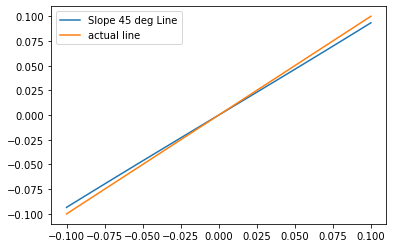

In [25]:
 index_range = np.linspace(-0.1, 0.1, 50)
 fig, ax = plt.subplots()
 ax.plot(index_range, E_X_given_Y)
 ax.plot(index_range, index_range)
 ax.legend(["Slope 45 deg Line","actual line"])
 
 plt.show()